In [4]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

In [12]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_TOTAL_CRUSTACEOS_M_e_Lagosta = pd.DataFrame(df[['Ano','Lagosta_art','Lagosta_ind','Lagosta_art_ind','TOTAL_CRUSTACEOS_M']])

#Juntando valores de art e ind em art_ind(quando os 2 estão presentes) 
for i in range(len(df_TOTAL_CRUSTACEOS_M_e_Lagosta['Ano'])):
  if pd.isnull(df_TOTAL_CRUSTACEOS_M_e_Lagosta.iloc[i,3])==True and pd.isnull(df_TOTAL_CRUSTACEOS_M_e_Lagosta.iloc[i,2])==False and pd.isnull(df_TOTAL_CRUSTACEOS_M_e_Lagosta.iloc[i,1])==False:
    df_TOTAL_CRUSTACEOS_M_e_Lagosta.iloc[i,3] = df_TOTAL_CRUSTACEOS_M_e_Lagosta.iloc[i,2] + df_TOTAL_CRUSTACEOS_M_e_Lagosta.iloc[i,1] 

dados = df_TOTAL_CRUSTACEOS_M_e_Lagosta[['Ano','Lagosta_art_ind','TOTAL_CRUSTACEOS_M']].dropna().reset_index(drop=True)


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1955,1956,1957,1958,1959,1960,1961,1965,1974])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Lagosta'] = dados.loc[i,'Lagosta_art_ind'] / dados.loc[i,'TOTAL_CRUSTACEOS_M']



prop = dados['Prop_Lagosta'].values
dados.head()

,Ano,Lagosta_art_ind,TOTAL_CRUSTACEOS_M,Prop_Lagosta
0,1962,8.0,1812.0,0.004415
1,1963,34.0,2055.0,0.016545
2,1964,13.0,2230.0,0.005830
3,1966,16.0,2482.0,0.006446
4,1967,71.0,3814.0,0.018616


In [13]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [37]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=70, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/pesos prop Lagosta_art_ind/.weights.h5', overwrite=True)

Epoch 1/70


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.9870
Epoch 2/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9586
Epoch 3/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9362
Epoch 4/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.9149
Epoch 5/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8935
Epoch 6/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8746
Epoch 7/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8567
Epoch 8/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8423
Epoch 9/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8306
Epoch 10/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8209
Epoch 11/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8134
Epoch 12/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8082
Epoch 13/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8053
Epoch 14/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8036
Epoch 15/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8016
Epoch 16/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/st

In [24]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Lagosta/pesos prop Lagosta_art_ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Previsões dos dados ausentes: [[0.00770368]
 [0.00811557]
 [0.00852649]
 [0.00898406]
 [0.0095137 ]
 [0.01024782]
 [0.01181121]
 [0.01984157]
 [0.02941943]]


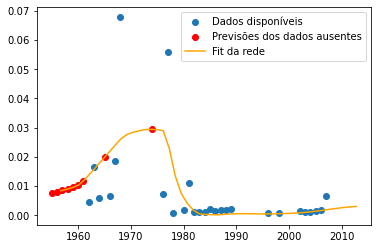

In [38]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

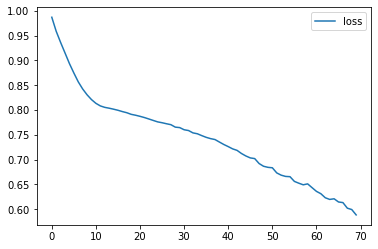

In [39]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [40]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Lagosta_art_ind',prev_continua)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
